In [1]:
from pycaret.regression import *

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [3]:
fpl_py = pd.read_csv("~/DSI-SRP1/FPL_ULTIMATE.csv", encoding = "latin1")
fpl_py.head()

,Unnamed: 0,player_name,club_name,position,position_index,goals_scored,assists,ict_index,goals_conceded,minutes,own_goals,total_points,bps,bonus,clean_sheets,GW,season
0,1,Aaron Lennon,Everton FC,Right Winger,4,0,0,0.9,0,15,0,1,6,0,0,1,2016/2017
1,2,Aaron Ramsey,Arsenal FC,Central Midfield,3,0,0,3.0,3,60,0,2,5,0,0,1,2016/2017
2,3,Abel Hernández,Hull City,Centre-Forward,5,0,1,5.7,1,90,0,5,10,0,0,1,2016/2017
3,4,Adama Diomande,Hull City,Centre-Forward,5,1,0,10.7,1,90,0,8,29,2,0,1,2016/2017
4,5,Adam Clayton,Middlesbrough FC,Defensive Midfield,3,0,0,1.4,1,90,0,2,6,0,0,1,2016/2017


In [4]:
fpl_py = fpl_py[['goals_scored', 'assists', 'minutes', 'clean_sheets', 'position_index','total_points']]

In [5]:
fpl_py_x = fpl_py[['goals_scored', 'assists', 'minutes', 'clean_sheets', 'position_index']]

In [6]:
fpl_py_y = fpl_py['total_points']

In [7]:
fpl_py_xtrain, fpl_py_xtest, fpl_py_ytrain, fpl_py_ytest = train_test_split(fpl_py_x, fpl_py_y, random_state = 10, train_size = 0.8)

In [8]:
fpl_py_new = fpl_py_xtrain.copy()
fpl_py_new['total_points'] = fpl_py_ytrain

In [9]:
fpl_reg = setup(data = fpl_py_new, target = 'total_points', session_id = 420, polynomial_features= True, polynomial_degree=3, train_size= 0.8)

 
Setup Succesfully Completed!


,Description,Value
0,session_id,420
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(37327, 6)"
4,Missing Values,False
5,Numeric Features,4
6,Categorical Features,1
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [10]:
fpl_lr = create_model('lr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,8.4962,146.9791,12.1235,0.9797,0.4508,0.4896
1,8.2901,143.3217,11.9717,0.9805,0.4313,0.4114
2,8.8769,171.8815,13.1104,0.9782,0.4338,0.4895
3,8.7005,153.6029,12.3937,0.9770,0.4536,0.4660
4,8.9128,165.7407,12.8740,0.9782,0.4611,0.4843
5,8.7786,161.0950,12.6923,0.9777,0.4668,0.4734
6,8.6476,149.4218,12.2238,0.9801,0.4342,0.4297
7,8.6338,149.6213,12.2320,0.9795,0.4337,0.4872
8,8.7362,157.4205,12.5467,0.9775,0.4485,0.4676
9,8.8909,161.9207,12.7248,0.9788,0.4441,0.4908


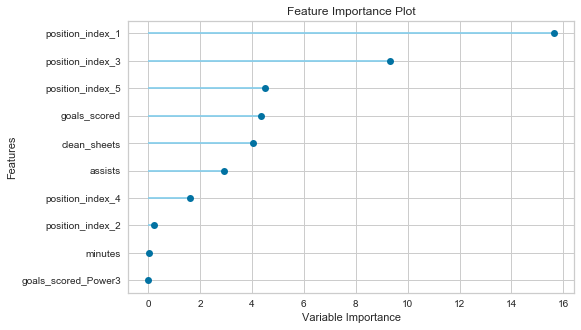

In [14]:
plot_model(fpl_lr, plot = 'feature')

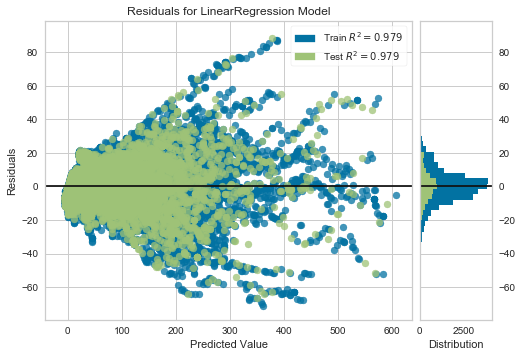

In [15]:
plot_model(fpl_lr, plot = 'residuals')

In [16]:
save_model(fpl_lr, model_name = "Fantasy_predictive_model")

Transformation Pipeline and Model Succesfully Saved
